In [0]:
file_path = 'dbfs:/user/hive/warehouse/glass'

# Read the Delta table
data = spark.read.format("delta").load(file_path)

# Show the first few rows of the DataFrame
display(data.limit(5))

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1
1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

# Columns that are features (assuming all columns except 'type' are features)
feature_columns = [col for col in data.columns if col != 'Type']

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Pipeline for transformations
pipeline = Pipeline(stages=[assembler, scaler])
pipeline_model = pipeline.fit(data)
data_transformed = pipeline_model.transform(data)

In [0]:
from pyspark.ml.feature import PCA

# Apply PCA
pca = PCA(k=len(feature_columns), inputCol="scaledFeatures", outputCol="pcaFeatures")
model = pca.fit(data_transformed)

# Variance explained by each component
variance = model.explainedVariance

# Convert to Pandas for plotting
import pandas as pd

variance_df = pd.DataFrame({'Variance Explained': variance, 
                            'Principal Components': range(1, len(variance) + 1)})


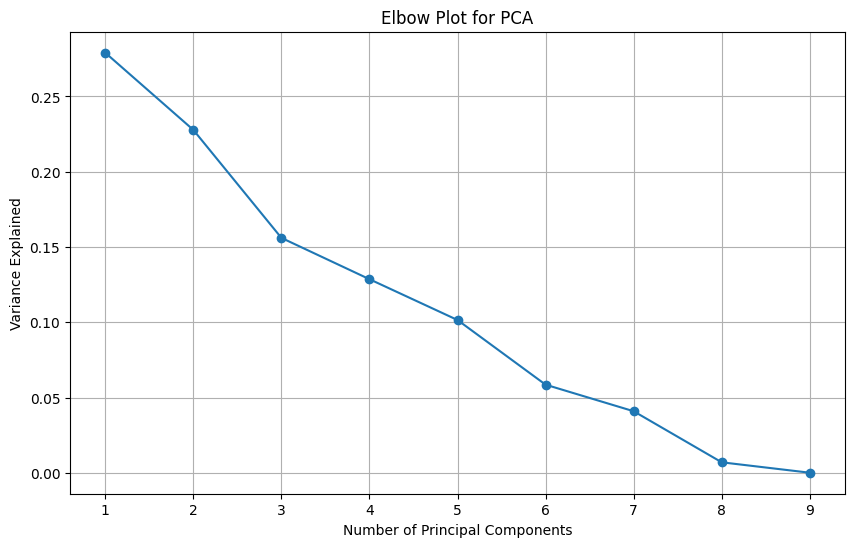

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(variance_df['Principal Components'], variance_df['Variance Explained'], 'o-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

In [0]:
n_components = 7

# Re-apply PCA with the optimal number of components
optimal_pca = PCA(k=n_components, inputCol="scaledFeatures", outputCol="optimalPcaFeatures")
optimal_model = optimal_pca.fit(data_transformed)
data_pca = optimal_model.transform(data_transformed)

# Show the result
display(data_pca.limit(5))

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,features,scaledFeatures,optimalPcaFeatures
1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1,"Map(vectorType -> dense, length -> 9, values -> List(1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0))","Map(vectorType -> dense, length -> 9, values -> List(500.848945006586, 16.703331628353496, 3.112850513096934, 2.203218260299005, 92.67366821321163, 0.09199747038936874, 6.148317857629576, 0.0, 0.0))","Map(vectorType -> dense, length -> 7, values -> List(-249.93976669635072, -134.1383766311976, 4.603987798311683, 20.720870351366102, -34.24875825202115, 56.37963515391479, -60.76349455278448))"
1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1,"Map(vectorType -> dense, length -> 9, values -> List(1.51761, 13.89, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0))","Map(vectorType -> dense, length -> 9, values -> List(499.72936892686107, 17.009477735911293, 2.4958266920153593, 2.723978940006043, 93.90019349605575, 0.73597976311495, 5.501866151455952, 0.0, 0.0))","Map(vectorType -> dense, length -> 7, values -> List(-248.21852569342155, -133.90861520937537, 4.788168467935411, 19.754467500538155, -34.25388110700692, 55.92453199104259, -61.13406780408929))"
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,"Map(vectorType -> dense, length -> 9, values -> List(1.51618, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0.0, 0.0))","Map(vectorType -> dense, length -> 9, values -> List(499.2584883992121, 16.568627341028062, 2.4611624324040347, 3.084505564418607, 94.2358740997815, 0.5979835575308969, 5.466732906555212, 0.0, 0.0))","Map(vectorType -> dense, length -> 7, values -> List(-247.8533593379581, -133.73896479223282, 4.786371951511583, 19.20178538364161, -34.23436204939418, 56.16655499672181, -60.791511347501505))"
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,"Map(vectorType -> dense, length -> 9, values -> List(1.51766, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0.0, 0.0))","Map(vectorType -> dense, length -> 9, values -> List(499.7458332809747, 16.17676032335408, 2.558222359315743, 2.583774141623379, 93.74526398664386, 0.8739759686990031, 5.775905461681728, 0.0, 0.0))","Map(vectorType -> dense, length -> 7, values -> List(-248.64956892866007, -133.70719780111645, 4.349613252685991, 19.41076510819242, -34.47259649311806, 56.32535699607462, -61.10579530583298))"
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,"Map(vectorType -> dense, length -> 9, values -> List(1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0))","Map(vectorType -> dense, length -> 9, values -> List(499.66680438122944, 16.25023538916795, 2.509692395859889, 2.483627857064333, 94.35207123184043, 0.8433101452358803, 5.670505726979506, 0.0, 0.0))","Map(vectorType -> dense, length -> 7, values -> List(-248.44104883183903, -133.5779291206289, 4.716706548602621, 19.064954193771058, -34.42849094861303, 56.33755621546928, -61.3163678082454))"


In [0]:
from pyspark.sql.functions import col

# Assuming 'type' is your target variable and 'optimalPcaFeatures' is the output of PCA
data_for_classification = data_pca.select(col("optimalPcaFeatures"), col("type"))

# Flatten the PCA features for use in classification algorithms
def extract(row):
    return (row.type, ) + tuple(row.optimalPcaFeatures.toArray().tolist())

data_extracted = data_for_classification.rdd.map(extract).toDF(["type"] + ["PC" + str(i) for i in range(1, n_components + 1)])

In [0]:
display(data_extracted.limit(5))

type,PC1,PC2,PC3,PC4,PC5,PC6,PC7
1,-249.93976669635072,-134.1383766311976,4.603987798311683,20.720870351366102,-34.24875825202115,56.37963515391479,-60.76349455278448
1,-248.21852569342155,-133.90861520937537,4.788168467935411,19.754467500538155,-34.25388110700692,55.92453199104259,-61.13406780408929
1,-247.8533593379581,-133.73896479223282,4.786371951511583,19.20178538364161,-34.23436204939418,56.16655499672181,-60.791511347501505
1,-248.64956892866007,-133.70719780111645,4.349613252685991,19.41076510819242,-34.47259649311806,56.32535699607462,-61.10579530583298
1,-248.44104883183903,-133.5779291206289,4.716706548602621,19.064954193771058,-34.42849094861303,56.33755621546928,-61.3163678082454


In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming 'type' is your target variable
# Convert string labels to numeric indices
label_indexer = StringIndexer(inputCol="type", outputCol="label").fit(data_extracted)

# Create a VectorAssembler to combine the principal component columns into a single vector column
pca_columns = ["PC" + str(i) for i in range(1, n_components + 1)]  # Adjust n_components to match your PCA component count
assembler = VectorAssembler(inputCols=pca_columns, outputCol="features")

# Define the classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[label_indexer, assembler, rf])

# Split the data into training and test sets
train_data, test_data = data_extracted.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy}")

Test Accuracy = 0.6666666666666666
